In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [2]:
file = 'Documents/fortran/n_body.txt'
df = pd.read_csv('n_body.txt', header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )

In [3]:
mass = df['mass']
x_positions = df['x']
y_positions = df['y']
z_positions = df['z']

x_acceleration = df['ax']
y_acceleration = df['ay']
z_acceleration = df['az']

N = len(np.unique(mass))
N_x_positions = [[] for _ in range(N)]
N_y_positions = [[] for _ in range(N)]
N_z_positions = [[] for _ in range(N)]

for i in range(len(x_positions)):
    mass_index = np.where(mass[i] == np.unique(mass))[0][0]
    N_x_positions[mass_index].append(x_positions[i])
    N_y_positions[mass_index].append(y_positions[i])
    N_z_positions[mass_index].append(z_positions[i])



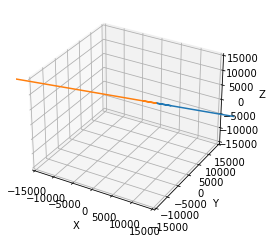

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

lim = 15e3

ax.set_xlim([-lim, lim ])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

for i in range(N):  
    x = N_x_positions[i]
    y = N_y_positions[i]
    z = N_z_positions[i]
    ax.plot3D(x, y, z)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

lim = 15e3

ax.set_xlim([-lim, lim ])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])



def animate(i):
    for j in range(N):
        x = N_x_positions
        y = N_y_positions
        z = N_z_positions
        scat = ax.scatter(x[j][0], y[j][0], z[j][0], c='r', marker='o', s=5)
        scat._offsets3d = ([x[j][i]],[y[j][i]],[z[j][i]])
    return scat,
    
ani = animation.FuncAnimation(fig, animate, repeat=True, frames= len(x) - 1, interval = 100)

writer = animation.PillowWriter(fps=30,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save('n_body.gif', writer=writer)

plt.show()